In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("dirty_cafe_sales.csv")  # cafe sales
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [6]:
df.isnull().sum()


Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [ ]:
df = df.fillna(method='ffill')

C:\Users\navee\AppData\Local\Temp\ipykernel_9656\3984534036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [8]:
df = df.drop_duplicates()

In [9]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

In [10]:
# Drop unnecessary columns for PCA
df_clean = df.drop(['Transaction ID', 'Transaction Date'], axis=1)

# Replace 'ERROR' and 'UNKNOWN' with NaN
df_clean.replace(['ERROR', 'UNKNOWN'], pd.NA, inplace=True)

# Convert numeric columns
for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Drop rows with missing values
df_clean = df_clean.dropna()

# Optional: Reset index
df_clean = df_clean.reset_index(drop=True)

# Final check
print("✅ Cleaned Data Shape:", df_clean.shape)
df_clean.head()


✅ Cleaned Data Shape: (6943, 6)


,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway
1,Cake,4.0,3.0,12.0,Cash,In-store
2,Coffee,2.0,2.0,4.0,Digital Wallet,In-store
3,Smoothie,5.0,4.0,20.0,Credit Card,In-store
4,Sandwich,5.0,3.0,15.0,Cash,Takeaway


In [29]:
unique_items = df_clean['Item'].unique()
print("Unique Cake Items:", unique_items)

Unique Cake Items: ['Coffee' 'Cake' 'Smoothie' 'Sandwich' 'Salad' 'Cookie' 'Juice' 'Tea']


### ✅ Summary of Cleaning:
- Dropped 2 columns: `Transaction ID` and `Transaction Date`
- Replaced values like "ERROR" or "UNKNOWN" with NaN
- Converted 'Quantity', 'Price Per Unit', and 'Total Spent' to numbers
- Removed rows with any missing or invalid data

Now the data is ready for:
- Encoding categorical columns (next step)
- Standardizing numeric data
- Applying PCA and clustering

## ✅ Summary of Cleaning (With Explanation)

- 🔸 **Dropped columns**: `Transaction ID` and `Transaction Date`
These are identifiers and timestamps, not useful for clustering or PCA. They don’t help in finding patterns.
- 🔸 **Replaced "ERROR" or "UNKNOWN" with NaN**
These are not valid values. Replacing them with NaN allows us to handle them properly (e.g., remove or fill them).

- 🔸 **Converted 'Quantity', 'Price Per Unit', and 'Total Spent' to numeric**
These were stored as text (object). PCA and clustering only work on numbers, so we must convert them to numeric.

- 🔸 **Dropped rows with missing or invalid data**
Rows with missing values can affect analysis. Removing them ensures we work with complete, clean data.

### ✅ Next Steps
Now the dataset is ready for:
- 🧠 **Encoding**: Convert categorical columns (like Item or Payment Method) into numeric form
- 📏 **Standardizing**: Scale the numeric data so all features are on the same scale
- 📉 **PCA**: Reduce dimensionality and visualize patterns
- 📊 **Clustering**: Group similar records based on patterns in the data


In [16]:
from sklearn.preprocessing import StandardScaler

# Step 1: One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=['Item', 'Payment Method', 'Location'], drop_first=True)

# Step 2: Standardize all numeric values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Step 3: Convert back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.columns)

# Show shape and sample
print("✅ Encoded & Standardized Data Shape:", X_scaled_df.shape)
X_scaled_df.head()


✅ Encoded & Standardized Data Shape: (6943, 13)


,Quantity,Price Per Unit,Total Spent,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway
0,-0.724418,-0.740266,-0.823348,2.579711,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,1.430096,-0.719211,1.001009
1,0.680507,0.041135,0.507097,-0.387640,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,-0.699254,-0.719211,-0.998992
2,-0.724418,-0.740266,-0.823348,2.579711,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,-0.699254,1.390413,-0.998992
3,1.382970,0.822536,1.837542,-0.387640,-0.372501,-0.392053,-0.37899,-0.378244,2.732595,-0.373002,1.430096,-0.719211,-0.998992
4,1.382970,0.041135,1.006014,-0.387640,-0.372501,-0.392053,-0.37899,2.643793,-0.365953,-0.373002,-0.699254,-0.719211,1.001009


## 🔢 Step 4: Encoding + Standardizing the Data

PCA and clustering work only with numbers.

### What we do in this step:
- Convert categorical columns into numbers using One-Hot Encoding
- Standardize all features using StandardScaler so they are on the same scale

This helps PCA treat all features fairly and avoid bias from large values.


In [18]:
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=['Item', 'Payment Method', 'Location'], drop_first=True)

# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Convert back to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=df_encoded.columns)

print("✅ Data after encoding and standardizing:", X_scaled_df.shape)
X_scaled_df.head()



✅ Data after encoding and standardizing: (6943, 13)


,Quantity,Price Per Unit,Total Spent,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway
0,-0.724418,-0.740266,-0.823348,2.579711,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,1.430096,-0.719211,1.001009
1,0.680507,0.041135,0.507097,-0.387640,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,-0.699254,-0.719211,-0.998992
2,-0.724418,-0.740266,-0.823348,2.579711,-0.372501,-0.392053,-0.37899,-0.378244,-0.365953,-0.373002,-0.699254,1.390413,-0.998992
3,1.382970,0.822536,1.837542,-0.387640,-0.372501,-0.392053,-0.37899,-0.378244,2.732595,-0.373002,1.430096,-0.719211,-0.998992
4,1.382970,0.041135,1.006014,-0.387640,-0.372501,-0.392053,-0.37899,2.643793,-0.365953,-0.373002,-0.699254,-0.719211,1.001009


In [27]:
X_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6943 entries, 0 to 6942
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Quantity                       6943 non-null   float64
 1   Price Per Unit                 6943 non-null   float64
 2   Total Spent                    6943 non-null   float64
 3   Item_Coffee                    6943 non-null   float64
 4   Item_Cookie                    6943 non-null   float64
 5   Item_Juice                     6943 non-null   float64
 6   Item_Salad                     6943 non-null   float64
 7   Item_Sandwich                  6943 non-null   float64
 8   Item_Smoothie                  6943 non-null   float64
 9   Item_Tea                       6943 non-null   float64
 10  Payment Method_Credit Card     6943 non-null   float64
 11  Payment Method_Digital Wallet  6943 non-null   float64
 12  Location_Takeaway              6943 non-null   f

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


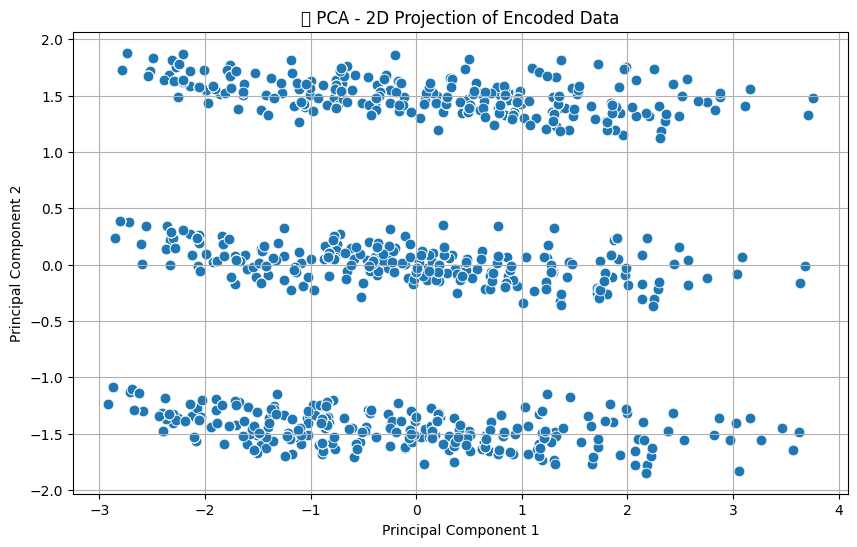

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled_df)

# Create DataFrame from PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, s=60)
plt.title('📉 PCA - 2D Projection of Encoded Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()




## 📉 Step 5: Apply PCA and Visualize

### What is PCA?
- PCA = Principal Component Analysis
- It reduces many features into a few "principal components"
- Helps to visualize data in 2D or 3D
- Keeps the most important patterns while removing noise

### Why we use PCA here:
- To reduce feature size after one-hot encoding
- To visualize clusters and structure


In [36]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.20640128 0.11591753]
Total Variance Captured: 0.3223188090356742


In [ ]:
from sklearn.decomposition import PCA

# Set PCA to keep 95% of variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled_df)

# Check how many components it used
print("✅ Number of components to capture 95% variance:", pca_95.n_components_)
print("Explained Variance Ratio (first few):", pca_95.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca_95.explained_variance_ratio_))


✅ Number of components to capture 95% variance: 10
Explained Variance Ratio (first few): [0.20640128 0.11591753 0.10248652 0.08903834 0.08828165 0.08789936
 0.08756844 0.08719586 0.07573279 0.03821734]
Total Variance Captured: 0.9787391046194683


In [38]:
df_pca_1 = pd.DataFrame(data=X_pca_95, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9','PC10'])

C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


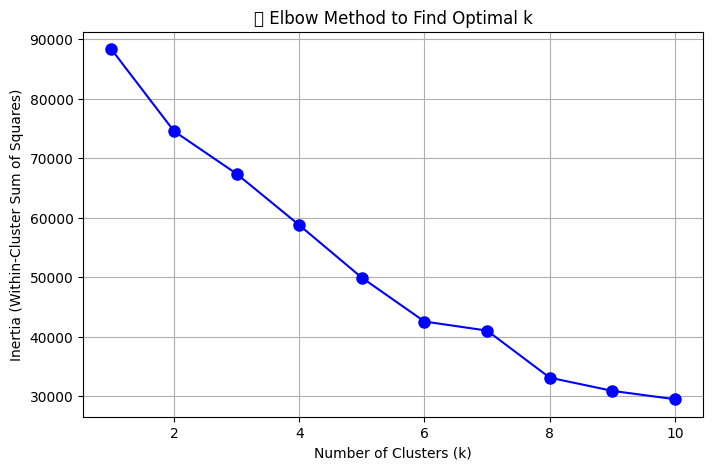

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the PCA-reduced data (2D)
X_pca_1 = df_pca_1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9','PC10']]

# Test k from 1 to 10
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_1)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('🔍 Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()


In [55]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca_1['Cluster'] = kmeans.fit_predict(df_pca_1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9','PC10']])


C:\Users\navee\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


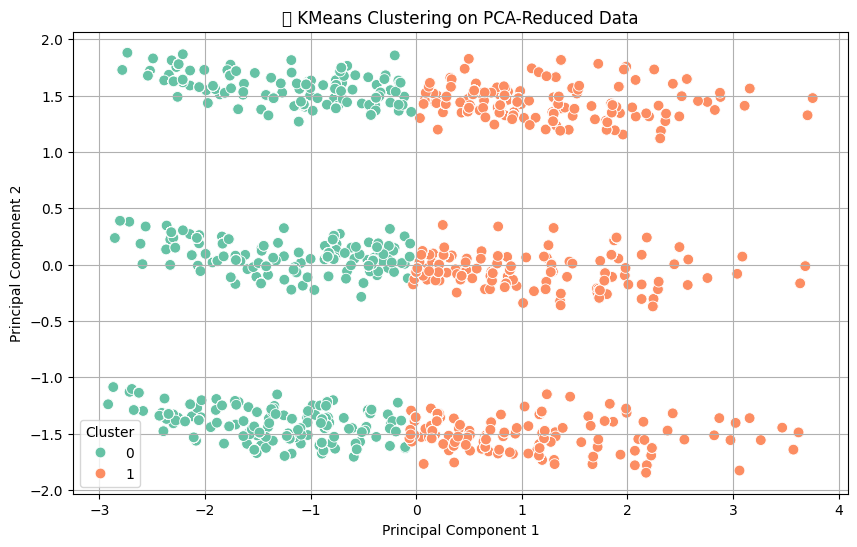

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2', s=60)
plt.title("🎯 KMeans Clustering on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()




In [43]:
from sklearn.cluster import KMeans

# Run KMeans on PCA-reduced data (95% variance version)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_95)

# Add cluster labels to the PCA DataFrame
df_clusters = pd.DataFrame(X_pca_95, columns=[f'PC{i+1}' for i in range(X_pca_95.shape[1])])
df_clusters['Cluster'] = clusters

# Show sample with cluster labels
df_clusters.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,-1.422027,1.506219,0.136586,-1.783573,1.838189,0.733032,-0.735971,0.486325,0.568565,0.520171,1
1,0.467769,0.019638,0.682812,0.318263,-0.138358,0.033489,-0.031120,-0.129484,-0.919874,-1.044069,1
2,-1.507313,-1.309567,-0.134811,-1.331995,1.721014,0.686137,-0.766830,0.261812,-1.599460,0.463626,1
3,2.365905,1.340370,1.530519,0.162583,-0.416779,-0.192421,1.614087,1.988143,-1.025238,0.470459,1
4,1.362742,-0.324179,1.016741,0.102693,-1.046938,2.278546,-0.230588,-0.570005,1.294516,-0.998798,1


## 🤖 Step 6: Clustering Using KMeans

### What is KMeans?
- KMeans is an unsupervised learning algorithm that groups data into clusters.
- It tries to find `k` center points (centroids) and assigns each point to the nearest one.
- The goal is to **minimize the distance** between points and their assigned cluster centers.

### Why We Use It:
- To discover natural groupings in the data (like customer types, behavior segments, etc.)
- We use it after PCA to group data in 2D space for visualization.

### How Many Clusters?
- We choose a number like `k = 3` as a starting point.
- We can use the elbow method later to find the best `k`.

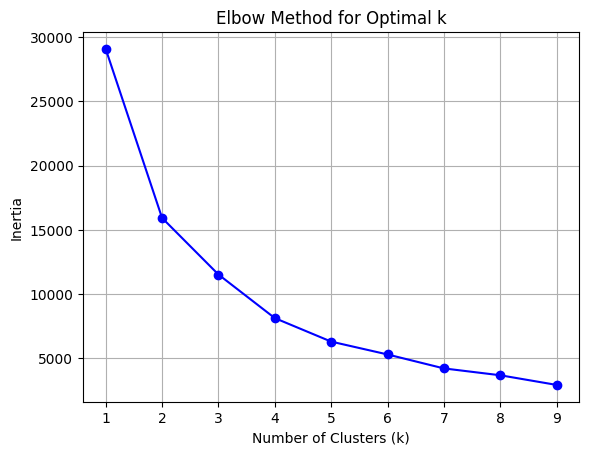

In [45]:
# Elbow method
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_pca[['PC1', 'PC2']])
    inertia.append(km.inertia_)

# Plot elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## 🔍 Finding the Optimal Number of Clusters (k)

We use the **Elbow Method** to find the best number of clusters.

### How it works:
- Try different values of k (number of clusters)
- For each k, calculate the total **inertia** (distance from each point to its cluster center)
- Plot k vs. inertia

### How to choose:
- Look for the "elbow" point where inertia stops decreasing sharply
- That point is the **optimal number of clusters**


In [30]:
from sklearn.metrics import silhouette_score
import numpy as np

# You already have this:
# kmeans = KMeans(n_clusters=3, random_state=42)
# df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# 1. Print cluster sizes
unique, counts = np.unique(df_pca['Cluster'], return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

# 2. Print cluster centers (in PCA space)
print("Cluster Centers (PCA space):")
print(kmeans.cluster_centers_)

# 3. Add cluster labels to the cleaned DataFrame (matches df_pca length)
df_clean['Cluster'] = df_pca['Cluster'].values

# 4. Summarize original features by cluster (numeric columns only)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
cluster_summary = df_clean.groupby('Cluster')[numeric_cols].mean()
print("\nCluster Summary (mean of original features):")
print(cluster_summary)

# 5. Calculate and print Silhouette Score (using the 2 PC features)
score = silhouette_score(df_pca[['PC1', 'PC2']], df_pca['Cluster'])
print(f"\nSilhouette Score: {score:.3f}")

# 6. (Optional) Save cleaned data with cluster labels
df_clean.to_csv('clustered_data_with_labels.csv', index=False)
print("\nSaved clustered data to 'clustered_data_with_labels.csv'")


Cluster sizes: {np.int32(0): np.int64(3321), np.int32(1): np.int64(3622)}
Cluster Centers (PCA space):
[[-1.43796569  0.02796568]
 [ 1.31770524 -0.02562684]]

Cluster Summary (mean of original features):
         Quantity  Price Per Unit  Total Spent  Cluster
Cluster                                                
0        2.699187        1.866757     4.685336      0.0
1        3.335726        3.938156    12.861817      1.0

Silhouette Score: 0.393

Saved clustered data to 'clustered_data_with_labels.csv'


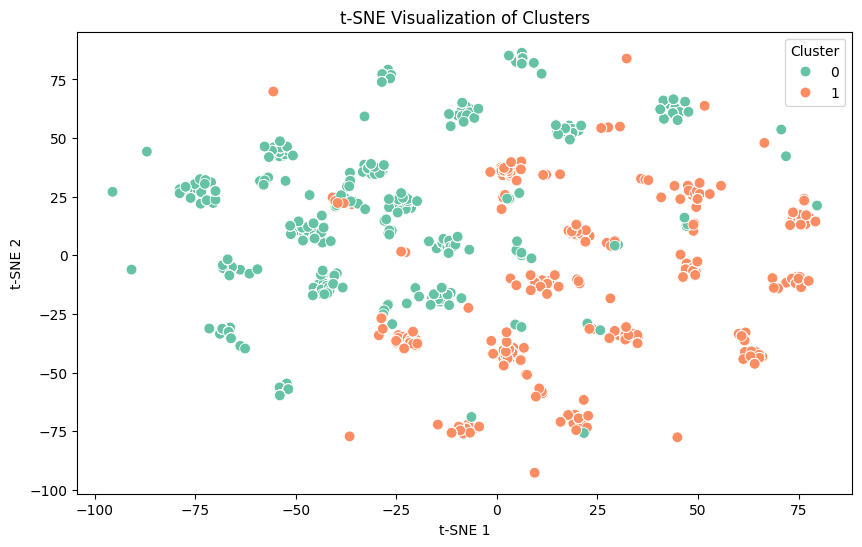

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run t-SNE on your scaled data or PCA components (you can try both)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df_clean.select_dtypes(include='number'))  # or use X_scaled if you have it

# Create a DataFrame with t-SNE results and cluster labels
import pandas as pd
tsne_df = pd.DataFrame(tsne_results, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = df_clean['Cluster'].values

# Plot t-SNE clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='tSNE1', y='tSNE2', hue='Cluster', palette='Set2', data=tsne_df, s=60)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()


What: t-SNE is a powerful technique that reduces high-dimensional data into 2D or 3D for easy visualization.

Why: It helps reveal hidden clusters and patterns in complex datasets that are hard to see otherwise.

How: By preserving local similarities, it maps similar points close together and pushes dissimilar points apart in the low-dimensional space.

When: Use t-SNE to visually explore and understand the structure of complex, high-dimensional data.

In [38]:
%pip install umap-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
# Add cluster labels to the original encoded dataset
df_encoded['Cluster'] = clusters

# Save it to CSV
df_encoded.to_csv("cafe_clustered_data.csv", index=False)

print("✅ Final dataset with cluster labels saved as 'cafe_clustered_data.csv'")


✅ Final dataset with cluster labels saved as 'cafe_clustered_data.csv'
